In [312]:
import shapefile
import geopandas as gpd
import shapely
import matplotlib.pyplot as plt


In [ ]:
shp = open('/Users/arnabroy/GitRepos/Examples/gz_2010_us_050_00_5m/gz_2010_us_050_00_5m.shp', "rb")
dbf = open('/Users/arnabroy/GitRepos/Examples/gz_2010_us_050_00_5m/gz_2010_us_050_00_5m.dbf', "rb")
shx = open('/Users/arnabroy/GitRepos/Examples/gz_2010_us_050_00_5m/gz_2010_us_050_00_5m.shx', 'rb')
prj = open('/Users/arnabroy/GitRepos/Examples/gz_2010_us_050_00_5m/gz_2010_us_050_00_5m.prj', 'rb')
r = shapefile.Reader(shp=shp, dbf=dbf, shx = shx, prj = prj)

In [313]:
attributes, geometry = [], []
field_names = [field[0] for field in r.fields[1:]]  
print(field_names)
print(r.shapeType)
print(r.bbox)

['GEO_ID', 'STATE', 'COUNTY', 'NAME', 'LSAD', 'CENSUSAREA']
5
[-179.14733999999999, 17.926875, 179.77847, 71.3525606439998]


In [314]:
attributes, geometry = [], []
field_names = [field[0] for field in r.fields[1:]]  
print(field_names)

['GEO_ID', 'STATE', 'COUNTY', 'NAME', 'LSAD', 'CENSUSAREA']


In [103]:
a = r.record(0)
print(a)

Record #0: ['0500000US02261', '02', '261', 'Valdez-Cordova', 'CA', 34239.88]


In [139]:
i = 0
for row in r.shapes(): 
    try:
        geometry.append(row.__geo_interface__)
        attributes.append(dict(zip(field_names, r.record(i))))
        i = i + 1
    except:
        i = i + 1
        pass
print(len(geometry))
print(len(attributes))


12884
12816


In [315]:
import fiona

In [338]:
zipfile = ZipFile(io.BytesIO(urlopen('https://www2.census.gov/geo/tiger/GENZ2010/gz_2010_us_050_00_5m.zip').read()))

In [339]:
filenames = [y for y in sorted(zipfile.namelist()) for ending in ['dbf', 'prj', 'shp', 'shx'] if y.endswith(ending)] 
print(filenames)

['gz_2010_us_050_00_5m.dbf', 'gz_2010_us_050_00_5m.prj', 'gz_2010_us_050_00_5m.shp', 'gz_2010_us_050_00_5m.shx']


In [340]:
dbf, prj, shp, shx = [io.BytesIO(zipfile.read(filename)) for filename in filenames]

r = shapefile.Reader(shp=shp, shx=shx, dbf=dbf)
print(r.numRecords)

3221


In [341]:

attributes, geometry = [], []
field_names = [field[0] for field in r.fields[1:]]  
i = 0
for row in r.shapes(): 
    try:
        shape = shapely.geometry.asShape(row.__geo_interface__)
        geometry.append(shape)
        attributes.append(dict(zip(field_names, r.record(i))))
    except:
        pass

In [342]:
print(len(geometry))
print(len(attributes))

3221
3221


In [343]:
import pandas as pd

In [344]:
#example = []
#for i in range(len(attributes)):
#    example.append(dict(attributes[i], **geometry[i]))
#df = pd.DataFrame(example)




# print(df.head(5))
# df = df.rename(columns={"coordinates":'geometry'})
# print(df.head(5))
# import random
# my_randoms = random.sample(range(100,100000), len(attributes))
# df['IncomeScaled'] = my_randoms

# gdf = gpd.GeoDataFrame(data = df, crs = {'init': 'epsg:3310'})
# #gdf = gdf.set_index("GEO_ID")['geometry']
# print(gdf.head())

pd.options.display.max_columns = None

gdf = gpd.GeoDataFrame(data = attributes, geometry = geometry)
my_randoms = random.sample(range(100,100000), len(attributes))
gdf['IncomeScaled'] = my_randoms
print(gdf.head())
print(gdf.columns)

GEO_ID STATE COUNTY            NAME LSAD  CENSUSAREA  \
0  0500000US02261    02    261  Valdez-Cordova   CA    34239.88   
1  0500000US02261    02    261  Valdez-Cordova   CA    34239.88   
2  0500000US02261    02    261  Valdez-Cordova   CA    34239.88   
3  0500000US02261    02    261  Valdez-Cordova   CA    34239.88   
4  0500000US02261    02    261  Valdez-Cordova   CA    34239.88   

                                            geometry  IncomeScaled  
0  MULTIPOLYGON (((-147.48383 60.61864, -147.5000...         95105  
1  POLYGON ((-162.58775 63.27573, -162.55188 63.2...         42869  
2  MULTIPOLYGON (((-132.56989 56.63350, -132.5703...         21052  
3  POLYGON ((-141.00246 65.83942, -141.09244 65.8...         73535  
4  POLYGON ((-109.04761 32.42638, -109.04829 32.0...         41056  
Index(['GEO_ID', 'STATE', 'COUNTY', 'NAME', 'LSAD', 'CENSUSAREA', 'geometry',
       'IncomeScaled'],
      dtype='object')


<AxesSubplot:>

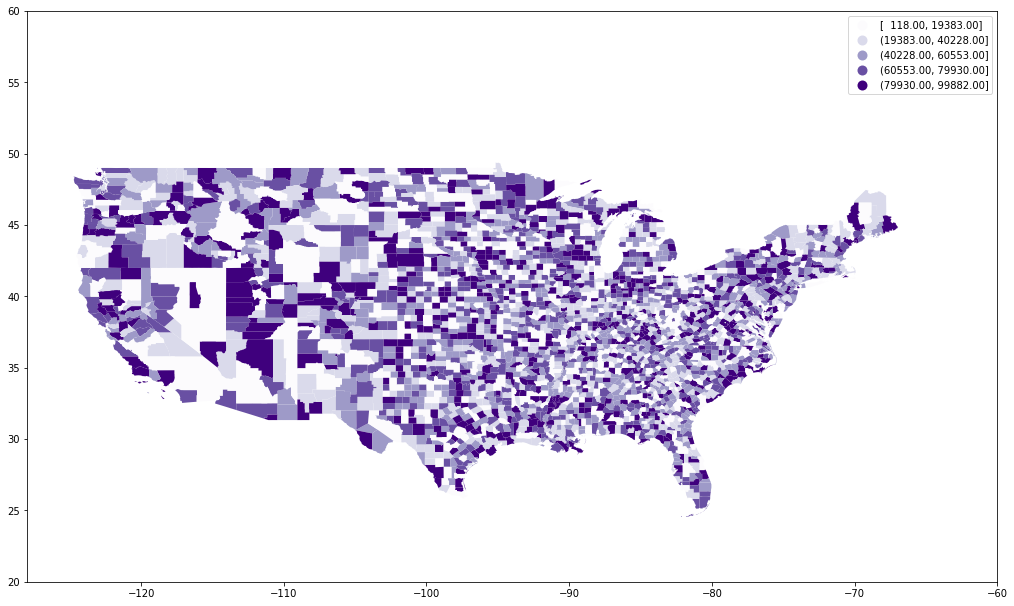

In [354]:

# ax = gdf.plot(figsize=(10,10), linewidth=2)
# ax.set_xlim(-180, -60)
# ax.set_ylim(20, 80)

fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
ax.set_xlim(-128, -60)
ax.set_ylim(20, 60)
gdf.plot(column= 'IncomeScaled', ax = ax, scheme='QUANTILES', cmap='Purples', legend=True)

